In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

Un fournisseur de communication a segmenté sa clientèle en fonction des modèles d'utilisation des services. En classant ces clients en 4 groupes: Basic-service, Total service, Plus service, E-service customers

#### Analyse de la forme et du fond
**--------------------------Analyse de la forme------------------------**
   - Identification dela target: **custcat**
   - Nombre de ligne et colonne: **1000 rows x 12 columns**
   - Type des variables: **quantitatives=*12*
   - Les valeurs manquantes: *aucune variable manquante*
   
**--------------------------Analyse du fond----------------------------**
   - Signification de la target: La variable target **custcat** contient quatre categorie
      - 1=>    266 === **Basic-service**
      - 2=>    217 === **Total service**
      - 3=>    281 === **Plus Service**     
      - 4=>    236 === **E-Service customers**
     
   
   - Signification des differentes variables:
   - Visualisation de la relation entre la target et les features:

### Read dataset

In [100]:
data = pd.read_csv(r"C:/Users/Aboubakr Ben Bach/Desktop/ML/python/Classification/teleCust1000t.csv")


In [12]:
df=data.copy()

In [15]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [20]:
data.shape

(1000, 12)

In [17]:
df.dtypes.value_counts()


int64      10
float64     2
dtype: int64

In [21]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


#### verification des variables manquantes

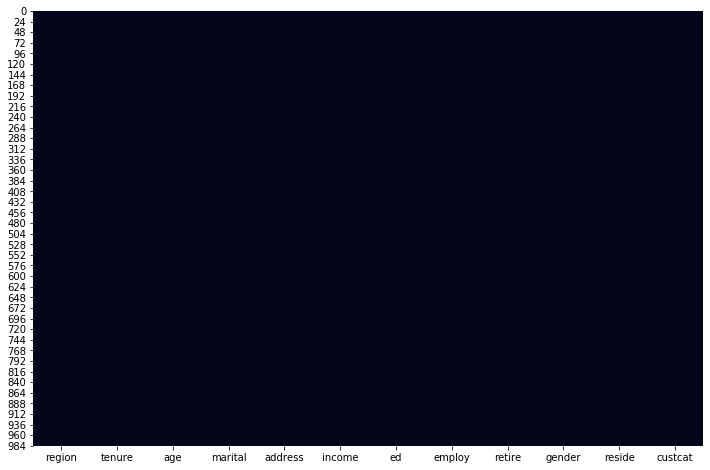

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cbar=False)

### Data visualization

In [25]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

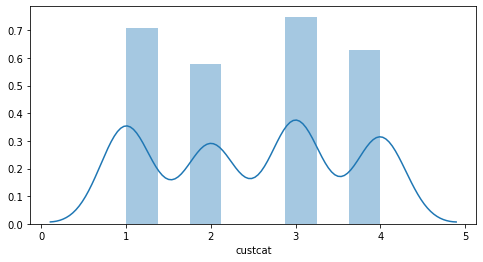

In [29]:
plt.figure(figsize=(8,4))
plt.tight_layout()
sns.distplot(data['custcat'])

In [30]:
(df.isna().sum()/df.shape[0]).sort_values()

region     0.0
tenure     0.0
age        0.0
marital    0.0
address    0.0
income     0.0
ed         0.0
employ     0.0
retire     0.0
gender     0.0
reside     0.0
custcat    0.0
dtype: float64

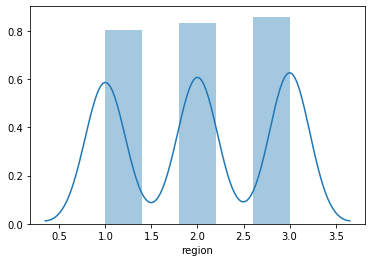

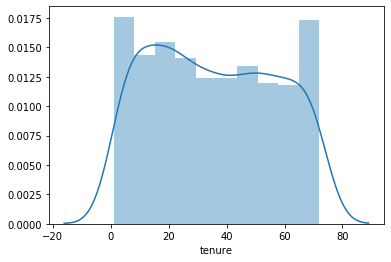

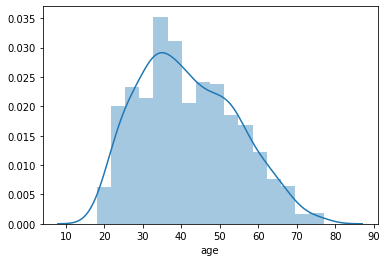

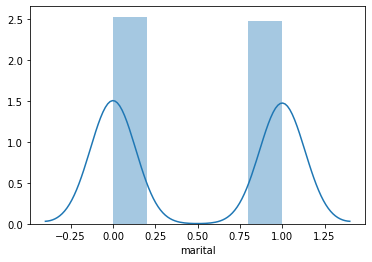

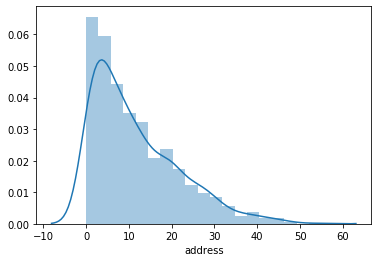

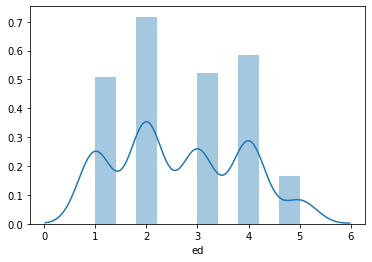

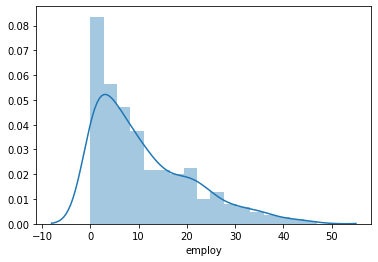

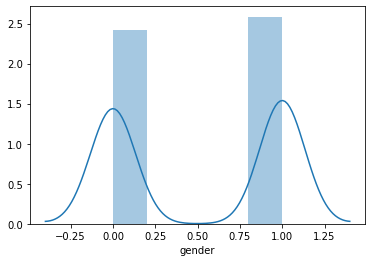

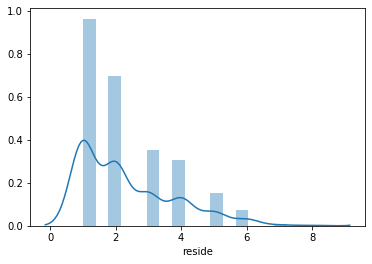

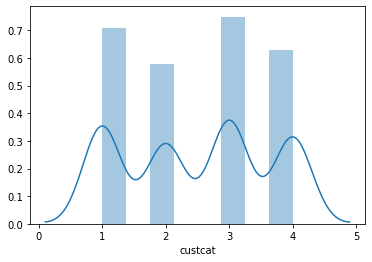

In [33]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

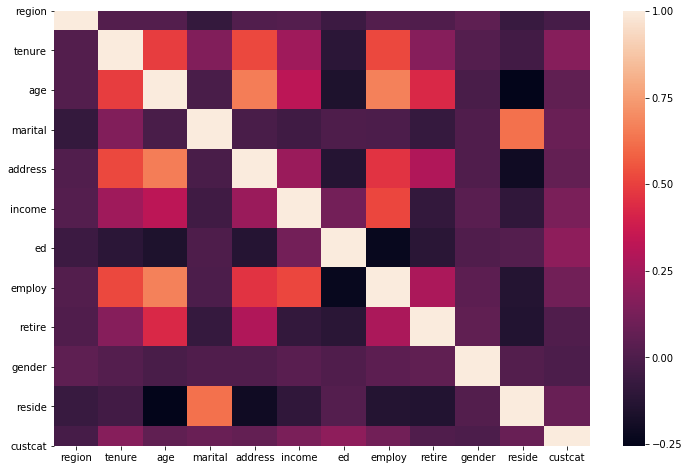

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())


##### on convertit la dataframe pandas en tableau numpy pour pouvoir faire de la normalisation

In [101]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [102]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### On normalise alors les données

La normalisation des données donne une moyenne nulle et une variance unitaire des données, c'est une bonne pratique, en particulier pour des algorithmes tels que KNN qui sont basés sur la distance des cas:

**StandardScaler** Standardisez les fonctionnalités en supprimant la moyenne et en mettant à l'échelle la variance unitaire

In [38]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train test split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
#on initialise le modele
model= KNeighborsClassifier(n_neighbors=7)

In [95]:
#on entrain le modèle
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [96]:
##on fai la prediction
y_pred = model.predict(X_test)
y_pred[0:5]

array([3, 1, 2, 2, 2], dtype=int64)

In [97]:
print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.5075
test score: 0.34


In [98]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score,accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[25 10 19  7]
 [12 14 11  7]
 [16 15 16  3]
 [10 12 10 13]]
              precision    recall  f1-score   support

           1       0.40      0.41      0.40        61
           2       0.27      0.32      0.29        44
           3       0.29      0.32      0.30        50
           4       0.43      0.29      0.35        45

    accuracy                           0.34       200
   macro avg       0.35      0.33      0.34       200
weighted avg       0.35      0.34      0.34       200



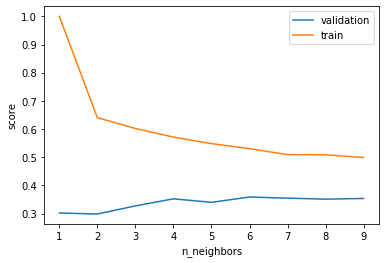

In [75]:
from sklearn.model_selection import validation_curve

import numpy as np

model= KNeighborsClassifier()
k=np.arange(1,10)

train_score, val_score= validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k,val_score.mean(axis=1), label='validation')
plt.plot(k,train_score.mean(axis=1), label='train')


plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

### Choix du k

In [91]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];

for n in range(1,Ks):
    #Train Model and Predict  
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)
    ####prediction
    y_pred=model.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.23 , 0.26 , 0.28 , 0.295, 0.32 , 0.31 , 0.34 , 0.34 , 0.325])

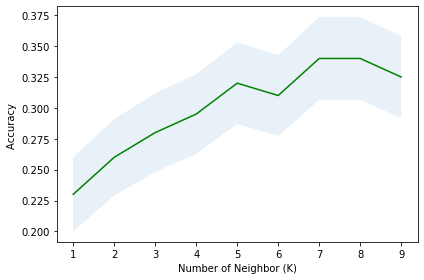

In [92]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbor (K)')
plt.tight_layout()
plt.show()

In [93]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 7


## voir la difference en prediction

In [68]:
df_pred = pd.DataFrame({'Réel': y_test.flatten(), 'Predit': y_pred.flatten()})
df_pred

,Réel,Predit
0,4,3
1,1,4
2,4,2
3,3,1
4,3,2
...,...,...
195,2,1
196,1,3
197,1,2
198,1,3


In [104]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'